# Premier pas vers l‚Äôindustrialisation avec les pipelines scikit

Lino Galiana  
2024-10-31

Ce chapitre pr√©sente la premi√®re application
d‚Äôune journ√©e de cours que j‚Äôai
donn√© √† l‚ÄôUniversit√© Dauphine dans le cadre
des *PSL Data Week*.

<details>
<summary>

D√©rouler les _slides_ associ√©es ci-dessous ou [cliquer ici](https://linogaliana.github.io/dauphine-week-data/#/title-slide)
pour les afficher en plein √©cran.

</summary>


<div class="sourceCode" id="cb1"><pre class="sourceCode yaml code-with-copy"><code class="sourceCode yaml"></code><button title="Copy to Clipboard" class="code-copy-button"><i class="bi"></i></button></pre><iframe class="sourceCode yaml code-with-copy" src="https://linogaliana.github.io/dauphine-week-data/#/title-slide"></iframe></div>

</details>

Pour lire les donn√©es de mani√®re efficace, nous
proposons d‚Äôutiliser le *package* `duckdb`.
Pour l‚Äôinstaller, voici la commande :

In [1]:
!pip install duckdb

# 1. Pourquoi utiliser les *pipelines* ?

## 1.1 D√©finitions pr√©alables

Ce chapitre nous am√®nera √† explorer plusieurs √©cosyst√®mes, pour lesquels on retrouve quelques buzz-words dont voici les d√©finitions :

| Terme | D√©finition |
|---------------------------|---------------------------------------------|
| *DevOps* | Mouvement en ing√©nierie informatique et une pratique technique visant √† l‚Äôunification du d√©veloppement logiciel (dev) et de l‚Äôadministration des infrastructures informatiques (ops) |
| *MLOps* | Ensemble de pratiques qui vise √† d√©ployer et maintenir des mod√®les de machine learning en production de mani√®re fiable et efficace |

Ce chapitre fera des r√©f√©rences r√©guli√®res au cours
de 3e ann√©e de l‚ÄôENSAE
[*‚ÄúMise en production de projets data science‚Äù*](https://ensae-reproductibilite.github.io/website/).

## 1.2 Objectif

Les chapitres pr√©c√©dents ont permis de montrer des bouts de code
√©pars pour entra√Æner des mod√®les ou faire du *preprocessing*.
Cette d√©marche est int√©ressante pour t√¢tonner mais risque d‚Äô√™tre co√ªteuse
ult√©rieurement s‚Äôil est n√©cessaire d‚Äôajouter une √©tape de *preprocessing*
ou de changer d‚Äôalgorithme.

Les *pipelines* sont pens√©s pour simplifier la mise en production
ult√©rieure d‚Äôun mod√®le de *machine learning*.
Ils sont au coeur de la d√©marche de *MLOps* qui est
pr√©sent√©e
dans le cours de 3e ann√©e de l‚ÄôENSAE
de [*‚ÄúMise en production de projets data science‚Äù*](https://ensae-reproductibilite.github.io/website/),
qui vise √† simplifier la mise en oeuvre op√©rationnelle de
projets utilisant des techniques de *machine learning*.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


## 1.3 Les *pipelines* `Scikit`

Heureusement, `Scikit` propose un excellent outil pour proposer un cadre
g√©n√©ral pour cr√©er une cha√Æne de production *machine learning*. Il
s‚Äôagit des
[*pipelines*](https://scikit-learn.org/stable/modules/compose.html).
Ils pr√©sentent de nombreux int√©r√™ts, parmi lesquels :

-   Ils sont tr√®s **pratiques** et **lisibles**. On rentre des donn√©es en entr√©e, on n‚Äôappelle qu‚Äôune seule fois les m√©thodes `fit` et `predict` ce qui permet de s‚Äôassurer une gestion coh√©rente des transformations de variables, par exemple apr√®s l‚Äôappel d‚Äôun `StandardScaler` ;
-   La **modularit√©** rend ais√©e la mise √† jour d‚Äôun pipeline et renforce la capacit√© √† le r√©utiliser ;
-   Ils permettent de facilement chercher les hyperparam√®tres d‚Äôun mod√®le. Sans *pipeline*, √©crire un code qui fait du *tuning* d‚Äôhyperparam√®tres peut √™tre p√©nible. Avec les *pipelines*, c‚Äôest une ligne de code ;
-   La **s√©curit√©** d‚Äô√™tre certain que les √©tapes de preprocessing sont bien appliqu√©es aux jeux de donn√©es d√©sir√©s avant l‚Äôestimation.

<div class="alert alert-warning" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-lightbulb"></i> Hint</h3>

Un des int√©r√™ts des *pipelines* scikit est qu‚Äôils fonctionnent aussi avec
des m√©thodes qui ne sont pas issues de `scikit`.

Il est possible d‚Äôintroduire un mod√®le de r√©seau de neurone `Keras` dans
un pipeline `scikit`.
Pour introduire un mod√®le √©conom√©trique `statsmodels`
c‚Äôest un peu plus co√ªteux mais nous allons proposer des exemples
qui peuvent servir de mod√®le et qui montrent que c‚Äôest faisable
sans trop de difficult√©.

</div>

# 2. Comment cr√©er un *pipeline*

Un *pipeline* est un encha√Ænement d‚Äôop√©rations qu‚Äôon code en enchainant
des pairs *(cl√©, valeur)* :

-   la cl√© est le nom du pipeline, cela peut √™tre utile lorsqu‚Äôon va
    repr√©senter le *pipeline* sous forme de diagramme acyclique (visualisation DAG)
    ou qu‚Äôon veut afficher des informations sur une √©tape
-   la valeur repr√©sente la transformation √† mettre en oeuvre dans le *pipeline*
    (c‚Äôest-√†-dire, √† l‚Äôexception de la derni√®re √©tape,
    mettre en oeuvre une m√©thode `transform` et √©ventuellement une
    transformation inverse).

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA

estimators = [("reduce_dim", PCA()), ("clf", SVC())]
pipe = Pipeline(estimators)
pipe


Pipeline(steps=[('reduce_dim', PCA()), ('clf', SVC())]) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.   Pipeline ? Documentation for Pipeline i Not fitted Pipeline(steps=[('reduce_dim', PCA()), ('clf', SVC())])  PCA ? Documentation for PCA PCA()  SVC ? Documentation for SVC SVC()

Au sein d‚Äôune √©tape de *pipeline*, les param√®tres d‚Äôun estimateur
sont accessibles avec la notation `<estimator>__<parameter>`.
Cela permet de fixer des valeurs pour les arguments des fonctions `scikit`
qui sont appel√©es au sein d‚Äôun *pipeline*.
C‚Äôest cela qui rendra l‚Äôapproche des pipelines particuli√®rement utile
pour la *grid search* :

In [4]:
from sklearn.model_selection import GridSearchCV

param_grid = {"reduce_dim__n_components": [2, 5, 10], "clf__C": [0.1, 10, 100]}
grid_search = GridSearchCV(pipe, param_grid=param_grid)
grid_search


GridSearchCV(estimator=Pipeline(steps=[('reduce_dim', PCA()), ('clf', SVC())]),
 param_grid={'clf__C': [0.1, 10, 100],
 'reduce_dim__n_components': [2, 5, 10]}) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.   GridSearchCV ? Documentation for GridSearchCV i Not fitted GridSearchCV(estimator=Pipeline(steps=[('reduce_dim', PCA()), ('clf', SVC())]),
 param_grid={'clf__C': [0.1, 10, 100],
 'reduce_dim__n_components': [2, 5, 10]}) estimator: Pipeline Pipeline(steps=[('reduce_dim', PCA()), ('clf', SVC())])  PCA ? Documentation for PCA PCA()  SVC ? Documentation for SVC SVC()

Ces *pipelines* sont initialis√©s sans donn√©es, il s‚Äôagit d‚Äôune structure formelle
que nous allons ensuite ajuster en entra√Ænant des mod√®les.

## 2.1 Donn√©es utilis√©es

Nous allons utiliser les donn√©es
de transactions immobili√®res [DVF](https://app.dvf.etalab.gouv.fr/) pour chercher
la meilleure mani√®re de pr√©dire, sachant les caract√©ristiques d‚Äôun bien, son
prix.

Ces donn√©es sont mises √† disposition
sur [`data.gouv`](https://www.data.gouv.fr/fr/datasets/demandes-de-valeurs-foncieres/).
N√©anmoins, le format csv n‚Äô√©tant pas pratique pour importer des jeux de donn√©es
volumineux, nous proposons de privil√©gier la version `Parquet` mise √†
disposition par Eric Mauvi√®re sur [`data.gouv`](https://www.data.gouv.fr/fr/datasets/dvf-2022-format-parquet/#/discussions).
L‚Äôapproche la plus efficace pour lire ces donn√©es est
d‚Äôutiliser `DuckDB` afin de lire le fichier, extraire les colonnes
d‚Äôint√©r√™t puis passer √† `Pandas` (pour en savoir plus sur
l‚Äôint√©r√™t de `DuckDB` pour lire des fichiers volumineux, vous pouvez
consulter [ce post de blog](https://ssphub.netlify.app/post/parquetrp/) ou
[celui-ci](https://www.icem7.fr/outils/3-explorations-bluffantes-avec-duckdb-1-interroger-des-fichiers-distants/) √©crit
par Eric Mauvi√®re).

M√™me si, en soi, les gains de temps sont faibles car `DuckDB` optimise
les requ√™tes HTTPS n√©cessaires √† l‚Äôimport des donn√©es, nous proposons
de t√©l√©charger les donn√©es pour r√©duire les besoins de bande passante.

In [5]:
import requests
import os

url = "https://www.data.gouv.fr/fr/datasets/r/56bde1e9-e214-408b-888d-34c57ff005c4"
file_name = "dvf.parquet"

# Check if the file already exists
if not os.path.exists(file_name):
    response = requests.get(url)

    if response.status_code == 200:
        with open(file_name, "wb") as f:
            f.write(response.content)
        print("T√©l√©chargement r√©ussi.")
    else:
        print(f"√âchec du t√©l√©chargement. Code d'√©tat : {response.status_code}")
else:
    print(f"Le fichier '{file_name}' existe d√©j√†. Aucun t√©l√©chargement n√©cessaire.")


En premier lieu, puisque cela va faciliter les requ√™tes SQL ult√©rieures, on cr√©e
une vue :

In [7]:
import duckdb

duckdb.sql(f'CREATE OR REPLACE VIEW dvf AS SELECT * FROM read_parquet("dvf.parquet")')


Les donn√©es prennent la forme suivante :

In [8]:
duckdb.sql(f"SELECT * FROM dvf LIMIT 5")


‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ Identifiant de doc‚Ä¶  ‚îÇ Reference document ‚îÇ ‚Ä¶ ‚îÇ Nature culture ‚îÇ Nature culture spe‚Ä¶  ‚îÇ Surface terrain ‚îÇ
‚îÇ       varchar        ‚îÇ      varchar       ‚îÇ   ‚îÇ    varchar     ‚îÇ       varchar        ‚îÇ      int64      ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ NULL                 ‚îÇ NULL               ‚îÇ ‚Ä¶ ‚îÇ NULL           ‚îÇ NULL                 ‚îÇ   

Les variables que nous allons conserver sont les suivantes,
nous allons les reformater pour la suite de l‚Äôexercice.

In [9]:
xvars = [
    "Date mutation",
    "Valeur fonciere",
    "Nombre de lots",
    "Code type local",
    "Nombre pieces principales",
]
xvars = ", ".join([f'"{s}"' for s in xvars])


In [10]:
mutations = duckdb.sql(
    f"""
    SELECT
    date_part('month', "Date mutation") AS month,
    substring("Code postal", 1, 2) AS dep,
    {xvars},
    COLUMNS('Surface Carrez.*')
    FROM dvf
    """
).to_df()

colonnes_surface = mutations.columns[mutations.columns.str.startswith("Surface Carrez")]
mutations.loc[:, colonnes_surface] = (
    mutations.loc[:, colonnes_surface]
    .replace({",": "."}, regex=True)
    .astype(float)
    .fillna(0)
)


<div class="alert alert-info" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-comment"></i> Note</h3>

Le fichier `Parquet` mis √† disposition sur `data.gouv` pr√©sente une incoh√©rence de mise en forme de
certaines colonnes √† cause des virgules qui emp√™chent le formattage sous forme de colonne
num√©rique.

Le code ci-dessus effectue la conversion ad√©quate au niveau de `Pandas`.

</div>

In [11]:
mutations.head(2)


<details>

<summary>

Introduire un effet confinement

</summary>

Si vous travaillez avec les donn√©es de 2020, n‚Äôoubliez pas
d‚Äôint√©grer l‚Äôeffet
confinement dans vos mod√®les puisque cela a lourdement
affect√© les possibilit√©s de transaction sur cette p√©riode, donc
l‚Äôeffet potentiel de certaines variables explicatives du prix.

Pour introduire cet effet, vous pouvez cr√©er une variable
indicatrice entre les dates en question:

``` python
mutations["confinement"] = (
    mutations["Date mutation"]
    .between(pd.to_datetime("2020-03-17"), pd.to_datetime("2020-05-03"))
    .astype(int)
)
```

Comme nous travaillons sur les donn√©es de 2022,
nous pouvons nous passer de cette variable.

</details>

Les donn√©es DVF proposent une observation par transaction.
Ces transactions
peuvent concerner plusieurs lots. Par exemple, un appartement
avec garage et cave comportera trois lots.

Pour simplifier,
on va cr√©er une variable de surface qui agr√®ge les diff√©rentes informations
de surface disponibles dans le jeu de donn√©es.
Les agr√©ger revient √† supposer que le mod√®le de fixation des prix est le m√™me
entre chaque lot. C‚Äôest une hypoth√®se simplificatrice qu‚Äôune personne plus
experte du march√© immobilier, ou qu‚Äôune approche propre de s√©lection
de variable pourrait amener √† nier. En effet, les variables
en question sont faiblement corr√©l√©es les unes entre elles, √† quelques
exceptions pr√®s (<a href="#fig-corr-surface" class="quarto-xref">Figure¬†2.1</a>):

In [12]:
corr = mutations.loc[
    :, mutations.columns[mutations.columns.str.startswith("Surface Carrez")].tolist()
]
corr.columns = corr.columns.str.replace("Carrez du ", "")
corr = corr.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(230, 20, as_cmap=True)


In [13]:
fig, ax = plt.subplots(1)
g = sns.heatmap(
    corr,
    ax=ax,
    mask=mask,
    vmax=0.3,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values,
    cmap=cmap,
    annot=True,
    fmt=".2f",
)
g


In [14]:
mutations["lprix"] = np.log(mutations["Valeur fonciere"])
mutations["surface"] = mutations.loc[:, colonnes_surface].sum(axis=1).astype(int)


/opt/conda/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning:

divide by zero encountered in log


In [15]:
mutations["surface"] = mutations.loc[
    :, mutations.columns[mutations.columns.str.startswith("Surface Carrez")].tolist()
].sum(axis=1)


# 3. Un premier pipeline : *random forest* sur des variables standardis√©es

Notre premier *pipeline* va nous permettre d‚Äôint√©grer ensemble:

1.  Une √©tape de *preprocessing* avec la standardisation de variables
2.  Une √©tape d‚Äôestimation du prix en utilisant un mod√®le de *random forest*

Pour le moment, on va prendre comme acquis un certain nombre de variables
explicatives (les *features*) et les hyperparam√®tres du mod√®le.

L‚Äôalgorithme des *random forest* est une technique statistique bas√©e sur
les arbres de d√©cision. Elle a √©t√© d√©finie explicitement par l‚Äôun
des pionniers du *machine learning*, Breiman (2001).
Il s‚Äôagit d‚Äôune [m√©thode ensembliste](https://en.wikipedia.org/wiki/Ensemble_learning)
puisqu‚Äôelle consiste √† utiliser plusieurs algorithmes (en l‚Äôoccurrence des arbres
de d√©cision) pour obtenir une meilleure pr√©diction que ne le permettraient
chaque mod√®le isol√©ment.

Les *random forest* sont une m√©thode d‚Äôaggr√©gation[1] d‚Äôarbres de d√©cision.
On calcule $K$ arbres de d√©cision et en tire, par une m√©thode d‚Äôagr√©gation,
une r√®gle de d√©cision moyenne qu‚Äôon va appliquer pour tirer une
pr√©diction de nos donn√©es.

![](https://miro.medium.com/v2/resize:fit:720/format:webp/1*jE1Cb1Dc_p9WEOPMkC95WQ.png)

L‚Äôun des int√©r√™ts
des *random forest* est qu‚Äôil existe des m√©thodes pour d√©terminer
l‚Äôimportance relative de chaque variable dans la pr√©diction.

Nous allons ici partir d‚Äôun *random forest* avec des valeurs d‚Äôhyperparam√®tres
donn√©es, √† savoir la profondeur de l‚Äôarbre.

## 3.1 D√©finition des ensembles *train* et *test*

Nous allons donc nous restreindre √† un sous-ensemble de colonnes dans un
premier temps.

Nous allons √©galement ne conserver que les
transactions inf√©rieures √† 5 millions
d‚Äôeuros (on anticipe que celles ayant un montant sup√©rieur sont des transactions
exceptionnelles dont le m√©canisme de fixation du prix diff√®re)

[1] Les *random forest* sont l‚Äôune des principales m√©thodes
ensemblistes. Outre cette approche, les plus connues sont
le [*bagging* (*boostrap aggregating*)](https://en.wikipedia.org/wiki/Bootstrap_aggregating) et le *boosting*
qui consistent √† choisir la pr√©diction √† privil√©gier
selon des algorithmes de choix diff√©rens.
Par exemple le *bagging* est une technique bas√©e sur le vote majoritaire (Breiman 1996).
Cette technique s‚Äôinspire du *bootstrap* qui, en √©conom√©trie,
consiste √† r√©-estimer sur *K* sous-√©chantillons
al√©atoires des donn√©es un estimateur afin d‚Äôen tirer, par exemple, un intervalle
de confiance empirique √† 95%. Le principe du *bagging* est le m√™me. On r√©-estime
*K* fois notre estimateur (par exemple un arbre de d√©cision) et propose une
r√®gle d‚Äôagr√©gation pour en tirer une r√®gle moyennis√©e et donc une pr√©diction.
Le *boosting* fonctionne selon un principe diff√©rent, bas√© sur
l‚Äôoptimisation de combinaisons de classifieurs faibles.

In [16]:
mutations2 = mutations.drop(
    colonnes_surface.tolist()
    + ["Date mutation", "lprix"],  # ajouter "confinement" si donn√©es 2020
    axis="columns",
).copy()

mutations2 = mutations2.loc[
    mutations2["Valeur fonciere"] < 5e6
]  # keep only values below 5 millions

mutations2.columns = mutations2.columns.str.replace(" ", "_")
mutations2 = mutations2.dropna(subset=["dep", "Code_type_local", "month"])


Notre *pipeline* va incorporer deux types de variables: les variables
cat√©gorielles et les variables num√©riques.
Ces diff√©rents types vont b√©n√©ficier d‚Äô√©tapes de *preprocessing*
diff√©rentes.

In [17]:
numeric_features = mutations2.columns[
    ~mutations2.columns.isin(["dep", "Code_type_local", "month", "Valeur_fonciere"])
].tolist()
categorical_features = ["dep", "Code_type_local", "month"]


Au passage, nous avons abandonn√© la variable de code postal pour privil√©gier
le d√©partement afin de r√©duire la dimension de notre jeu de donn√©es. Si on voulait
vraiment avoir un bon mod√®le, il faudrait faire autrement car le code postal
est probablement un tr√®s bon pr√©dicteur du prix d‚Äôun bien, une fois que
les caract√©ristiques du bien sont contr√¥l√©es.

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercice 1 : D√©coupage des √©chantillons</h3>

Nous allons stratifier notre √©chantillonage de *train/test* par d√©partement
afin de tenir compte, de mani√®re minimale, de la g√©ographie.
Pour acc√©l√©rer les calculs pour ce tutoriel, nous n‚Äôallons consid√©rer que
30% des transactions observ√©es sur chaque d√©partement.

Voici le code pour le faire:

``` python
mutations2 = mutations2.groupby("dep").sample(frac=0.1, random_state=123)
```

Avec la fonction ad√©quate de `Scikit`, faire un d√©coupage de `mutations2`
en *train* et *test sets*
en suivant les consignes suivantes:

-   20% des donn√©es dans l‚Äô√©chantillon de *test* ;
-   L‚Äô√©chantillonnage est stratifi√© par d√©partements ;
-   Pour avoir des r√©sultats reproductibles, choisir une racine √©gale √† 123.

</div>

## 3.2 D√©finition du premier *pipeline*

Pour commencer, nous allons fixer la taille des arbres de d√©cision avec
l‚Äôhyperparam√®tre `max_depth = 2`.

Notre *pipeline* va int√©grer les √©tapes suivantes :

1.  **Preprocessing** :
    -   Les variables num√©riques vont √™tre standardis√©es avec un `StandardScaler`.
        Pour cela, nous allons utiliser la liste `numeric_features` d√©finie pr√©c√©demment.
    -   Les variables cat√©gorielles vont √™tre explos√©es avec un *one hot encoding*
        (m√©thode `OneHotEncoder` de `scikit`)
        Pour cela, nous allons utiliser la liste `categorical_features`
2.  **Random forest** : nous allons appliquer l‚Äôestimateur *ad hoc* de `Scikit`.

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercice 2 : Construction d'un premier pipeline formel</h3>

1.  Initialiser un *random forest* de profondeur 2. Fixer la racine √† 123 pour avoir des r√©sultats reproductibles.
2.  La premi√®re √©tape du *pipeline* (nommer cette couche *preprocessor*) consiste √† appliquer les √©tapes de *preprocessing* adapt√©es √† chaque type de variables:
    -   Pour les variables num√©riques, appliquer une √©tape d‚Äôimputation √† la moyenne puis standardiser celles-ci
    -   Pour les variables cat√©gorielles, appliquer un [*one hot encoding*](https://en.wikipedia.org/wiki/One-hot)
3.  Appliquer comme couche de sortie le mod√®le d√©fini plus t√¥t.

*üí° Il est recommand√© de s‚Äôaider de la documentation de `Scikit`. Si vous avez besoin d‚Äôun indice suppl√©mentaire, consulter le pipeline pr√©sent√© ci-dessous.*

</div>

A l‚Äôissue de cet exercice, nous devrions obtenir le *pipeline* suivant.

Pipeline(steps=[('preprocessor',
 ColumnTransformer(transformers=[('pipeline',
 Pipeline(steps=[('simpleimputer',
 SimpleImputer()),
 ('standardscaler',
 StandardScaler())]),
 ['Nombre_de_lots',
 'Nombre_pieces_principales',
 'surface']),
 ('onehotencoder',
 OneHotEncoder(handle_unknown='ignore',
 sparse_output=False),
 ['dep', 'Code_type_local',
 'month'])])),
 ('randomforest',
 RandomForestRegressor(max_depth=2, random_state=123))]) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.   Pipeline ? Documentation for Pipeline i Not fitted Pipeline(steps=[('preprocessor',
 ColumnTransformer(transformers=[('pipeline',
 Pipeline(steps=[('simpleimputer',
 SimpleImputer()),
 ('standardscaler',
 StandardScaler())]),
 ['Nombre_de_lots',
 'Nombre_pieces_principales',
 'surface']),
 ('onehotencoder',
 OneHotEncoder(handle_unknown='ignore',
 sparse_output=False),
 ['dep', 'Code_type_local',
 'month'])])),
 ('randomforest',
 RandomForestRegressor(max_depth=2, random_state=123))])  preprocessor: ColumnTransformer ? Documentation for preprocessor: ColumnTransformer ColumnTransformer(transformers=[('pipeline',
 Pipeline(steps=[('simpleimputer',
 SimpleImputer()),
 ('standardscaler',
 StandardScaler())]),
 ['Nombre_de_lots', 'Nombre_pieces_principales',
 'surface']),
 ('onehotencoder',
 OneHotEncoder(handle_unknown='ignore',
 sparse_output=False),
 ['dep', 'Code_type_local', 'month'])]) pipeline ['Nombre_de_lots', 'Nombre_pieces_principales', 'surface']  SimpleImputer ? Documentation for SimpleImputer SimpleImputer()  StandardScaler ? Documentation for StandardScaler StandardScaler() onehotencoder ['dep', 'Code_type_local', 'month']  OneHotEncoder ? Documentation for OneHotEncoder OneHotEncoder(handle_unknown='ignore', sparse_output=False)  RandomForestRegressor ? Documentation for RandomForestRegressor RandomForestRegressor(max_depth=2, random_state=123)

Nous avons construit ce pipeline sous forme de couches successives. La couche
`randomforest` prendra automatiquement le r√©sultat de la couche `preprocessor`
en *input*. La couche `features` permet d‚Äôintroduire de mani√®re relativement
simple (quand on a les bonnes m√©thodes) la complexit√© du *preprocessing*
sur donn√©es r√©elles dont les types divergent.

A cette √©tape, rien n‚Äôa encore √©t√© estim√©.
C‚Äôest tr√®s simple √† mettre en oeuvre
avec un *pipeline*.

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercice 3 : Mise en oeuvre du pipeline</h3>

1.  Estimer les param√®tres du mod√®le sur le jeu d‚Äôentra√Ænement
2.  Observer la mani√®re dont les donn√©es d‚Äôentra√Ænement sont transform√©es
    par l‚Äô√©tape de *preprocessing* avec les m√©thodes ad√©quates sur 4 observations de `X_train`
    tir√©es al√©atoirement
3.  Utiliser ce mod√®le pour pr√©dire le prix sur l‚Äô√©chantillon de test. A partir de ces quelques pr√©dictions,
    quel semble √™tre le probl√®me ?
4.  Observer la mani√®re dont ce *preprocessing* peut s‚Äôappliquer sur deux exemples fictifs :
    -   Un appartement (`code_type_local = 2`) dans le 75, vendu au mois de mai, unique lot de la vente avec 3 pi√®ces, faisant 75m¬≤ ;
    -   Une maison (`code_type_local = 1`) dans le 06, vendue en d√©cembre, dans une transaction avec 2 lots. La surface compl√®te est de 180m¬≤ et le bien comporte 6 pi√®ces.
5.  D√©duire sur ces deux exemples le prix pr√©dit par le mod√®le.
6.  Calculer et interpr√©ter le RMSE sur l‚Äô√©chantillon de test. Ce mod√®le est-il satisfaisant ?

</div>

Pipeline(steps=[('preprocessor',
 ColumnTransformer(transformers=[('pipeline',
 Pipeline(steps=[('simpleimputer',
 SimpleImputer()),
 ('standardscaler',
 StandardScaler())]),
 ['Nombre_de_lots',
 'Nombre_pieces_principales',
 'surface']),
 ('onehotencoder',
 OneHotEncoder(handle_unknown='ignore',
 sparse_output=False),
 ['dep', 'Code_type_local',
 'month'])])),
 ('randomforest',
 RandomForestRegressor(max_depth=2, random_state=123))]) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.   Pipeline ? Documentation for Pipeline i Fitted Pipeline(steps=[('preprocessor',
 ColumnTransformer(transformers=[('pipeline',
 Pipeline(steps=[('simpleimputer',
 SimpleImputer()),
 ('standardscaler',
 StandardScaler())]),
 ['Nombre_de_lots',
 'Nombre_pieces_principales',
 'surface']),
 ('onehotencoder',
 OneHotEncoder(handle_unknown='ignore',
 sparse_output=False),
 ['dep', 'Code_type_local',
 'month'])])),
 ('randomforest',
 RandomForestRegressor(max_depth=2, random_state=123))])  preprocessor: ColumnTransformer ? Documentation for preprocessor: ColumnTransformer ColumnTransformer(transformers=[('pipeline',
 Pipeline(steps=[('simpleimputer',
 SimpleImputer()),
 ('standardscaler',
 StandardScaler())]),
 ['Nombre_de_lots', 'Nombre_pieces_principales',
 'surface']),
 ('onehotencoder',
 OneHotEncoder(handle_unknown='ignore',
 sparse_output=False),
 ['dep', 'Code_type_local', 'month'])]) pipeline ['Nombre_de_lots', 'Nombre_pieces_principales', 'surface']  SimpleImputer ? Documentation for SimpleImputer SimpleImputer()  StandardScaler ? Documentation for StandardScaler StandardScaler() onehotencoder ['dep', 'Code_type_local', 'month']  OneHotEncoder ? Documentation for OneHotEncoder OneHotEncoder(handle_unknown='ignore', sparse_output=False)  RandomForestRegressor ? Documentation for RandomForestRegressor RandomForestRegressor(max_depth=2, random_state=123)

array([282871.63598981, 301165.65351098, 301165.65351098, ...,
       282871.63598981, 471048.40037679, 282871.63598981])

array([642280.20111587, 282871.63598981])

433497.6437239088

## 3.3 *Variable importance*

Les pr√©dictions semblent avoir une assez faible variance, comme si des variables
de seuils intervenaient. Nous allons donc devoir essayer de comprendre pourquoi.

La *‚Äúvariable importance‚Äù*
se r√©f√®re √† la mesure de l‚Äôinfluence de chaque variable d‚Äôentr√©e sur la performance du mod√®le.
L‚Äôimpuret√© fait r√©f√©rence √† l‚Äôincertitude ou √† l‚Äôentropie pr√©sente dans un ensemble de donn√©es.
Dans le contexte des *random forest*, cette mesure est souvent calcul√©e en √©valuant la r√©duction moyenne de l‚Äôimpuret√© des n≈ìuds de d√©cision caus√©e par une variable sp√©cifique.
Cette approche permet de quantifier l‚Äôimportance des variables dans le processus de prise de d√©cision du mod√®le, offrant ainsi des intuitions sur les caract√©ristiques les plus informatives pour la pr√©diction (plus de d√©tails [sur ce blog](https://mljar.com/blog/feature-importance-in-random-forest/)).

On ne va repr√©senter, parmi notre ensemble important de colonnes, que celles
qui ont une importance non nulle.

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercice 4 : Compr√©hension du mod√®le</h3>

1.  R√©cup√©rer la *feature importance* directement depuis la couche adapt√©e de votre *pipeline*
2.  Utiliser le code suivant pour calculer l‚Äôintervalle de confiance de cette mesure d‚Äôimportance:

``` python
std = np.std(
    [tree.feature_importances_ for tree in pipe["randomforest"].estimators_], axis=0
)
```

1.  Repr√©senter les variables d‚Äôimportance non nulle. Qu‚Äôen concluez-vous ?

</div>

Le graphique d‚Äôimportance des variables que vous devriez obtenir √† l‚Äôissue
de cet exercice est le suivant.

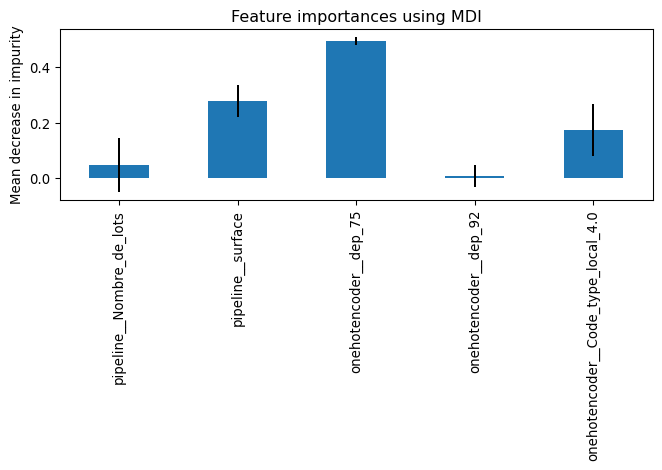

<Axes: title={'center': 'Feature importances using MDI'}, ylabel='Mean decrease in impurity'>

Les statistiques obtenues par le biais de cette *variable importance*
sont un peu rudimentaires mais permettent d√©j√† de comprendre
le probl√®me de notre mod√®le.

On voit donc que deux de nos variables d√©terminantes sont des effets fixes
g√©ographiques (qui servent √† ajuster de la diff√©rence de prix entre
Paris et les Hauts de Seine et le reste de la France), une autre variable
est un effet fixe type de bien. Les deux variables qui pourraient introduire
de la variabilit√©, √† savoir la surface et, dans une moindre mesure, le
nombre de lots, ont une importance moindre.

<div class="alert alert-info" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-comment"></i> Note</h3>

Id√©alement, on utiliserait `Yellowbrick` pour repr√©senter l‚Äôimportance des variables
Mais en l‚Äô√©tat actuel du *pipeline* on a beaucoup de variables dont le poids
est nul qui viennent polluer la visualisation. Vous pouvez
consulter la
[documentation de `Yellowbrick` sur ce sujet](https://www.scikit-yb.org/en/latest/api/model_selection/importances.html)

</div>

Les pr√©dictions peuvent nous sugg√©rer √©galement
qu‚Äôil y a un probl√®me.

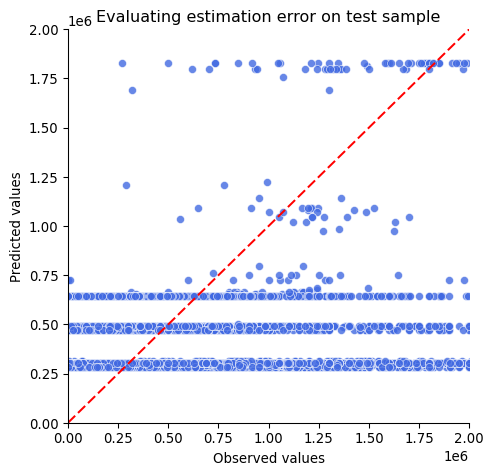

# 4. Restriction du champ du mod√®le

Mettre en oeuvre un bon mod√®le de prix au niveau France enti√®re
est complexe. Nous allons donc nous restreindre au champ suivant:
les appartements dans Paris.

In [31]:
mutations_paris = mutations.drop(
    colonnes_surface.tolist()
    + ["Date mutation", "lprix"],  # ajouter "confinement" si donn√©es 2020
    axis="columns",
).copy()

mutations_paris = mutations_paris.loc[
    mutations_paris["Valeur fonciere"] < 5e6
]  # keep only values below 5 millions

mutations_paris.columns = mutations_paris.columns.str.replace(" ", "_")
mutations_paris = mutations_paris.dropna(subset=["dep", "Code_type_local", "month"])
mutations_paris = mutations_paris.loc[mutations_paris["dep"] == "75"]
mutations_paris = mutations_paris.loc[mutations_paris["Code_type_local"] == 2].drop(
    ["dep", "Code_type_local"], axis="columns"
)
mutations_paris.loc[mutations_paris["surface"] > 0]


27971 rows √ó 5 columns

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercice 4 : Pipeline plus simple</h3>

Reprendre les codes pr√©c√©dents et reconstruire notre *pipeline* sur
la nouvelle base en mettant en oeuvre une m√©thode de *boosting*
plut√¥t qu‚Äôune for√™t al√©atoire.

*La correction de cet exercice est apparente pour simplifier les prochaines √©tapes mais essayez de faire celui-ci de vous-m√™me*.

</div>

A l‚Äôissue de cet exercice, vous devriez avoir des *MDI* proches
de celles-ci :

In [32]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split


mutations_paris = mutations.drop(
    colonnes_surface.tolist()
    + ["Date mutation", "lprix"],  # ajouter "confinement" si donn√©es 2020
    axis="columns",
).copy()

mutations_paris = mutations_paris.loc[
    mutations_paris["Valeur fonciere"] < 5e6
]  # keep only values below 5 millions

mutations_paris.columns = mutations_paris.columns.str.replace(" ", "_")
mutations_paris = mutations_paris.dropna(subset=["dep", "Code_type_local", "month"])
mutations_paris = mutations_paris.loc[mutations_paris["dep"] == "75"]
mutations_paris = mutations_paris.loc[mutations_paris["Code_type_local"] == 2].drop(
    ["dep", "Code_type_local", "Nombre_de_lots"], axis="columns"
)
mutations_paris.loc[mutations_paris["surface"] > 0]


numeric_features = mutations_paris.columns[
    ~mutations_paris.columns.isin(["month", "Valeur_fonciere"])
].tolist()
categorical_features = ["month"]

reg = GradientBoostingRegressor(random_state=0)

numeric_pipeline = make_pipeline(SimpleImputer(), StandardScaler())
transformer = make_column_transformer(
    (numeric_pipeline, numeric_features),
    (OneHotEncoder(sparse_output=False, handle_unknown="ignore"), categorical_features),
)
pipe = Pipeline(steps=[("preprocessor", transformer), ("boosting", reg)])

X_train, X_test, y_train, y_test = train_test_split(
    mutations_paris.drop("Valeur_fonciere", axis=1),
    mutations_paris[["Valeur_fonciere"]].values.ravel(),
    test_size=0.2,
    random_state=123,
)

pipe.fit(X_train, y_train)

pd.DataFrame(
    pipe["boosting"].feature_importances_, index=pipe[:-1].get_feature_names_out()
)


# 5. Recherche des hyperparam√®tres optimaux avec une validation crois√©e

On d√©tecte que le premier mod√®le n‚Äôest pas tr√®s bon et ne nous aidera
pas vraiment √† √©valuer de mani√®re fiable l‚Äôappartement de nos r√™ves.

On va essayer de voir si notre mod√®le ne serait pas meilleur avec des
hyperparam√®tres plus adapt√©s. Apr√®s tout, nous avons choisi par d√©faut
la profondeur de l‚Äôarbre mais c‚Äô√©tait un choix au doigt mouill√©.

‚ùìÔ∏è Quels sont les hyperparam√®tres qu‚Äôon peut essayer d‚Äôoptimiser ?

In [33]:
pipe["boosting"].get_params()


{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 0,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

Un [d√©tour par la documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)
nous aide √† comprendre ceux sur lesquels on va jouer. Par exemple, il serait
absurde de jouer sur le param√®tre `random_state` qui est la racine du g√©n√©rateur
pseudo-al√©atoire.

In [34]:
X = pd.concat((X_train, X_test), axis=0)
Y = np.concatenate([y_train, y_test])


Nous allons nous contenter de jouer sur les param√®tres:

-   `n_estimators`: Le nombre d‚Äôarbres de d√©cision que notre for√™t contient
-   `max_depth`: La profondeur de chaque arbre

Il existe plusieurs mani√®res de faire de la validation crois√©e. Nous allons ici
utiliser la *grid search* qui consiste √† estimer et tester le mod√®le sur chaque
combinaison d‚Äôune grille de param√®tres et s√©lectionner le couple de valeurs
des hyperparam√®tres amenant √† la meilleure pr√©diction. Par d√©faut, `scikit`
effectue une *5-fold cross validation*. Nous n‚Äôallons pas changer
ce comportement.

Comme expliqu√© pr√©c√©demment, les param√®tres s‚Äôappelent sous la forme
`<step>__<parameter_name>`

La validation crois√©e pouvant √™tre tr√®s consommatrice de temps, nous
n‚Äôallons l‚Äôeffectuer que sur un nombre r√©duit de valeurs de notre grille.
Il est possible de passer la liste des valeurs √† passer au crible sous
forme de liste
(comme nous allons le proposer pour l‚Äôargument `max_depth` dans l‚Äôexercice ci-dessous) ou
sous forme d‚Äô`array` (comme nous allons le proposer pour l‚Äôargument `n_estimators`) ce qui est
souvent pratique pour g√©n√©rer un criblage d‚Äôun intervalle avec `np.linspace`.

<div class="alert alert-warning" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-lightbulb"></i> Hint </h3>

Les estimations sont, par d√©faut, men√©es de mani√®re s√©quentielle (l‚Äôune apr√®s
l‚Äôautre). Nous sommes cependant face √† un probl√®me
*embarassingly parallel*.
Pour gagner en performance, il est recommand√© d‚Äôutiliser l‚Äôargument
`n_jobs=-1`.

</div>

In [35]:
import numpy as np
from sklearn.model_selection import GridSearchCV

import time

start_time = time.time()
# Parameters of pipelines can be set using ‚Äò__‚Äô separated parameter names:
param_grid = {
    "boosting__n_estimators": np.linspace(5, 25, 5).astype(int),
    "boosting__max_depth": [2, 4],
}
grid_search = GridSearchCV(pipe, param_grid=param_grid)
grid_search.fit(X_train, y_train)

end_time = time.time()

print(f"Elapsed time : {int(end_time - start_time)} seconds")


GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
 ColumnTransformer(transformers=[('pipeline',
 Pipeline(steps=[('simpleimputer',
 SimpleImputer()),
 ('standardscaler',
 StandardScaler())]),
 ['Nombre_pieces_principales',
 'surface']),
 ('onehotencoder',
 OneHotEncoder(handle_unknown='ignore',
 sparse_output=False),
 ['month'])])),
 ('boosting',
 GradientBoostingRegressor(random_state=0))]),
 param_grid={'boosting__max_depth': [2, 4],
 'boosting__n_estimators': array([ 5, 10, 15, 20, 25])}) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.   GridSearchCV ? Documentation for GridSearchCV i Fitted GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
 ColumnTransformer(transformers=[('pipeline',
 Pipeline(steps=[('simpleimputer',
 SimpleImputer()),
 ('standardscaler',
 StandardScaler())]),
 ['Nombre_pieces_principales',
 'surface']),
 ('onehotencoder',
 OneHotEncoder(handle_unknown='ignore',
 sparse_output=False),
 ['month'])])),
 ('boosting',
 GradientBoostingRegressor(random_state=0))]),
 param_grid={'boosting__max_depth': [2, 4],
 'boosting__n_estimators': array([ 5, 10, 15, 20, 25])}) best_estimator_: Pipeline Pipeline(steps=[('preprocessor',
 ColumnTransformer(transformers=[('pipeline',
 Pipeline(steps=[('simpleimputer',
 SimpleImputer()),
 ('standardscaler',
 StandardScaler())]),
 ['Nombre_pieces_principales',
 'surface']),
 ('onehotencoder',
 OneHotEncoder(handle_unknown='ignore',
 sparse_output=False),
 ['month'])])),
 ('boosting',
 GradientBoostingRegressor(max_depth=4, n_estimators=25,
 random_state=0))])  preprocessor: ColumnTransformer ? Documentation for preprocessor: ColumnTransformer ColumnTransformer(transformers=[('pipeline',
 Pipeline(steps=[('simpleimputer',
 SimpleImputer()),
 ('standardscaler',
 StandardScaler())]),
 ['Nombre_pieces_principales', 'surface']),
 ('onehotencoder',
 OneHotEncoder(handle_unknown='ignore',
 sparse_output=False),
 ['month'])]) pipeline ['Nombre_pieces_principales', 'surface']  SimpleImputer ? Documentation for SimpleImputer SimpleImputer()  StandardScaler ? Documentation for StandardScaler StandardScaler() onehotencoder ['month']  OneHotEncoder ? Documentation for OneHotEncoder OneHotEncoder(handle_unknown='ignore', sparse_output=False)  GradientBoostingRegressor ? Documentation for GradientBoostingRegressor GradientBoostingRegressor(max_depth=4, n_estimators=25, random_state=0)

In [37]:
grid_search.best_params_
grid_search.best_estimator_


Pipeline(steps=[('preprocessor',
 ColumnTransformer(transformers=[('pipeline',
 Pipeline(steps=[('simpleimputer',
 SimpleImputer()),
 ('standardscaler',
 StandardScaler())]),
 ['Nombre_pieces_principales',
 'surface']),
 ('onehotencoder',
 OneHotEncoder(handle_unknown='ignore',
 sparse_output=False),
 ['month'])])),
 ('boosting',
 GradientBoostingRegressor(max_depth=4, n_estimators=25,
 random_state=0))]) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.   Pipeline ? Documentation for Pipeline i Fitted Pipeline(steps=[('preprocessor',
 ColumnTransformer(transformers=[('pipeline',
 Pipeline(steps=[('simpleimputer',
 SimpleImputer()),
 ('standardscaler',
 StandardScaler())]),
 ['Nombre_pieces_principales',
 'surface']),
 ('onehotencoder',
 OneHotEncoder(handle_unknown='ignore',
 sparse_output=False),
 ['month'])])),
 ('boosting',
 GradientBoostingRegressor(max_depth=4, n_estimators=25,
 random_state=0))])  preprocessor: ColumnTransformer ? Documentation for preprocessor: ColumnTransformer ColumnTransformer(transformers=[('pipeline',
 Pipeline(steps=[('simpleimputer',
 SimpleImputer()),
 ('standardscaler',
 StandardScaler())]),
 ['Nombre_pieces_principales', 'surface']),
 ('onehotencoder',
 OneHotEncoder(handle_unknown='ignore',
 sparse_output=False),
 ['month'])]) pipeline ['Nombre_pieces_principales', 'surface']  SimpleImputer ? Documentation for SimpleImputer SimpleImputer()  StandardScaler ? Documentation for StandardScaler StandardScaler() onehotencoder ['month']  OneHotEncoder ? Documentation for OneHotEncoder OneHotEncoder(handle_unknown='ignore', sparse_output=False)  GradientBoostingRegressor ? Documentation for GradientBoostingRegressor GradientBoostingRegressor(max_depth=4, n_estimators=25, random_state=0)

Toutes les performances sur les ensembles d‚Äô√©chantillons et de test sur la grille
d‚Äôhyperparam√®tres sont disponibles dans l‚Äôattribut:

In [38]:
perf_random_forest = pd.DataFrame(grid_search.cv_results_)


Regardons les r√©sultats moyens pour chaque valeur des hyperparam√®tres:

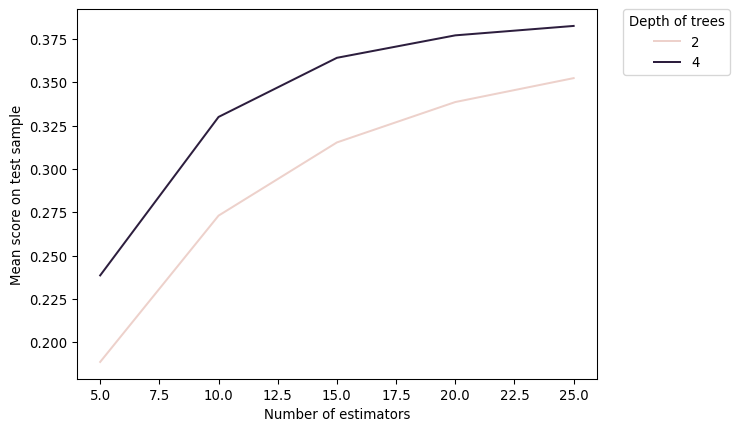

In [39]:
fig, ax = plt.subplots(1)
g = sns.lineplot(
    data=perf_random_forest,
    ax=ax,
    x="param_boosting__n_estimators",
    y="mean_test_score",
    hue="param_boosting__max_depth",
)
g.set(xlabel="Number of estimators", ylabel="Mean score on test sample")
g
plt.legend(
    bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0, title="Depth of trees"
)


Globalement, √† profondeur d‚Äôarbre donn√©e, le nombre d‚Äôarbres affecte
la performance. Changer la profondeur de l‚Äôarbre am√©liore la
performance de mani√®re plus marqu√©e.

Maintenant, il nous reste √† re-entra√Æner le mod√®le avec ces nouveaux
param√®tres sur l‚Äôensemble du jeu de *train* et l‚Äô√©valuer sur l‚Äôensemble
du jeu de *test* :

In [40]:
pipe_optimal = grid_search.best_estimator_
pipe_optimal.fit(X_train, y_train)

compar = pd.DataFrame([y_test, pipe_optimal.predict(X_test)]).T
compar.columns = ["obs", "pred"]
compar["diff"] = compar.obs - compar.pred


On obtient le RMSE suivant :

Le RMSE sur le jeu de test est 562,317

Et si on regarde la qualit√© en pr√©diction:

On obtient plus de variance dans la pr√©diction, c‚Äôest d√©j√† un peu mieux.
Cependant, cela reste d√©cevant pour plusieurs raisons:

-   nous n‚Äôavons pas fait d‚Äô√©tape de s√©lection de variable
-   nous n‚Äôavons pas chercher √† d√©terminer si la variable √† pr√©dire la plus
    pertinente √©tait le prix ou une transformation de celle-ci
    (par exemple le prix au $m^2$)

# 6. Prochaine √©tape

Nous avons un mod√®le certes perfectible mais fonctionnel.
La question qui se pose maintenant c‚Äôest d‚Äôessayer d‚Äôen faire
quelque chose au service des utilisateurs. Cela nous am√®ne vers
la question de la **mise en production**.

Ceci est l‚Äôobjet du prochain chapitre. Il s‚Äôagira d‚Äôune version introductive
des enjeux √©voqu√©s dans le cadre du cours de
3e ann√©e de [mise en production de projets de *data science*](https://ensae-reproductibilite.github.io/website/).

# 7. R√©f√©rences

Breiman, Leo. 1996. ¬´¬†Bagging predictors¬†¬ª. *Machine learning* 24: 123‚Äë40.

‚Äî‚Äî‚Äî. 2001. ¬´¬†Random forests¬†¬ª. *Machine learning* 45: 5‚Äë32.